In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/keith/Desktop/Thinkful/IBM_HR_Analytics.csv') # Lead data set
pd.set_option('display.max_columns', None) # disables trucated columns 
pd.set_option('display.max_rows', None) # disables trucated rows
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Choose one variable and plot that variable four different ways.

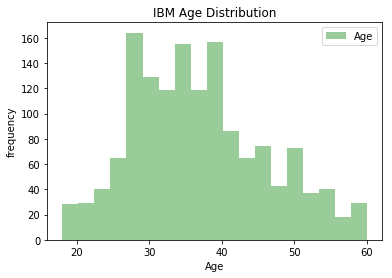

In [3]:

x = df["Age"]
 
sns.distplot(x, color='green',kde=False, label="Age")
plt.xlabel('Age')
plt.ylabel('frequency')
plt.legend(loc='upper right')
plt.title('IBM Age Distribution')
plt.show() 

### Histogram

#### Pros: 
Shows the age distribution and the total number of data points can be extracted. 
#### Cons:
Show very litte information for how much room it consumes. 

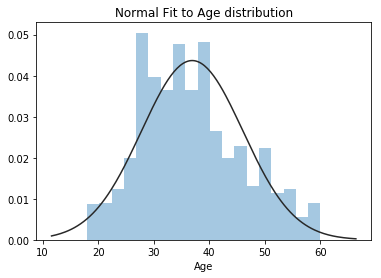

In [4]:
ax = plt.axes()
sns.distplot(x, kde=False, fit=stats.norm, label='Age');
ax.set_title('Normal Fit to Age distribution')
plt.show()

### Histogram with parametric fit distribution line
#### Pros:
Compares the distribution of the data to a known distribution. In this case a normal one. 
#### Cons:
It is difficult and nearly impossible to extract the total number of data points.

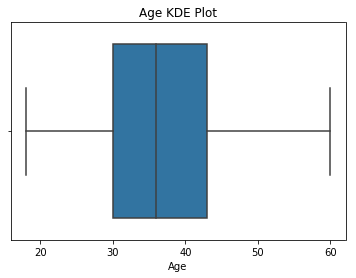

In [5]:
sns.boxplot(x)
plt.title('Age KDE Plot')
plt.show()


### Boxplot
#### Pros:
Provides information on the skewness of the age distribution. If there were any outliers this plot would show them.
#### Cons:
The raw data is not clearly depicted. The mean and mode cannot be determined from the boxplot.

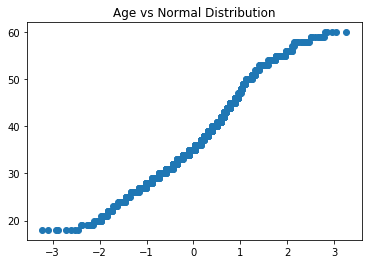

In [6]:
norm= np.random.normal(0, 1, 1470)
norm.sort()
plt.plot(norm, df['Age'].sort_values(), 'o' ) 
plt.title('Age vs Normal Distribution')
plt.show() 

### Quantile-Quantile Plot
#### Pros:
It can be determined how closely the age distribution fit the normal distribution.
#### Cons:
There is really only one piece of information that can be seen in the plot.

### Choose two continuous variables, and plot them three different ways.

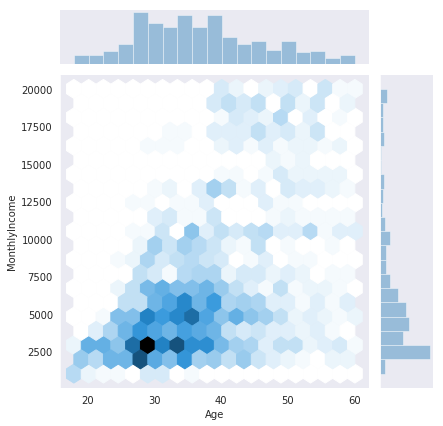

In [7]:
with sns.axes_style('dark'):
    sns.jointplot("Age", "MonthlyIncome", data=df, kind='hex')
plt.show()

### Joint Plot
#### Pros: 
It is easy to see the distributions of the two variables while at the same time you are able to see them plotted together to see what the relationship is between the variables. It saves space
#### Cons:
The plot is a little cumbersome to look at. If there is enough room seperate plots would be better.

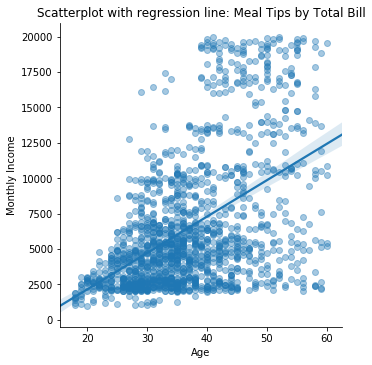

In [8]:
g = sns.lmplot(y='MonthlyIncome', 
               x='Age',
               data=df, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Monthly Income")
g.set_xlabels("Age")
plt.title('Scatterplot with regression line: Meal Tips by Total Bill')
plt.show()

### Scatter Plot with trendline
#### Pros:
Clustering of data can be seen from the plot and in this case the majoity of the income is in the $2500-6000 range. Since there is trend line you can see the relationship between age and monthly income. It is also easy to spot outliers.
#### Cons:
Without the trendline it may be difficult to determine a trend only by looking.  

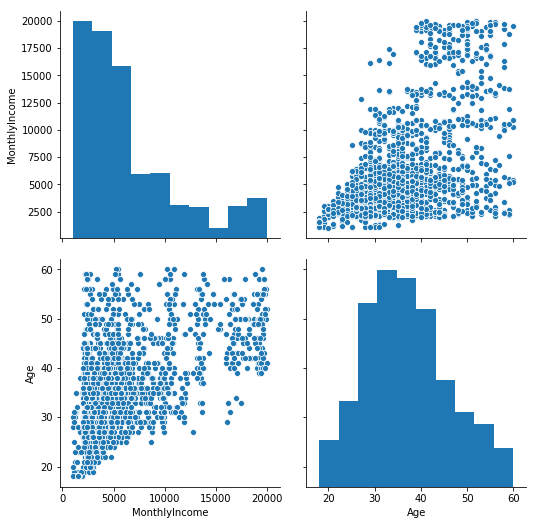

In [9]:
a = df[['MonthlyIncome','Age']] 
sns.pairplot(a,height=3.7);
plt.show()

### Pair Plot
#### Pros:
You can see the distributions and the scatter plots together in one area in order to possible see a relationship. Its easier to look at than if they were in a layered plot.
#### Cons:
The small size of the scatter plots may make it difficult to analyze

### Choose one continuous variable and one categorical variable, and plot them six different ways.

In [10]:
c = df[['EducationField','Age']].sort_values(by='Age')

c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


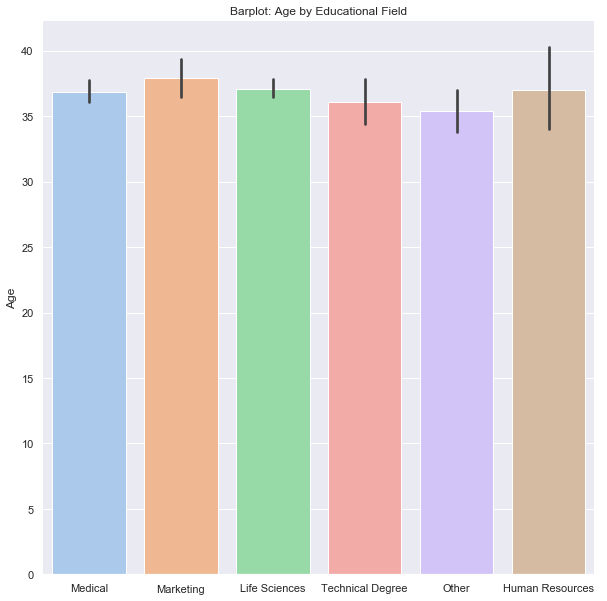

In [11]:
sns.set(style="darkgrid")

g = sns.factorplot(x="EducationField", y="Age",  data=c,
                   height=8.6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Age")
g.set_xlabels("")
plt.title('Barplot: Age by Educational Field')
plt.show()

### Bar plot
#### Pros:
You can easily see the mean age of each field and its error. 
#### Cons:
Visually it could be misleading

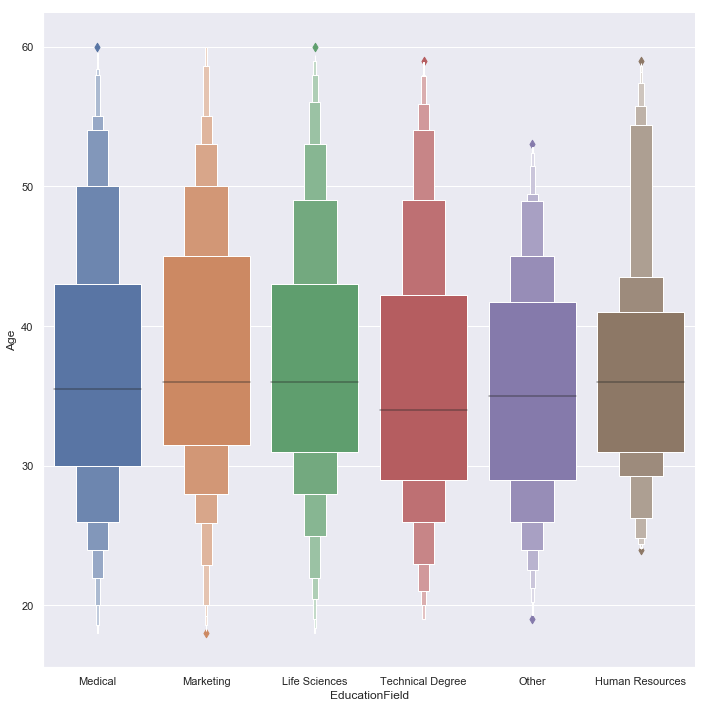

In [12]:
sns.catplot(x="EducationField", y="Age", kind="boxen", data=c,height=10);

### Boxen Plot
#### Pros:
You can easily see the mean and compare it with the other categories. The data on the tail end is more accurate than a normal box plot and you can see more detail of the shape of the distribution.
#### Cons:
Does not keep exact values of the data only a summary. Less precise with smaller data sets.

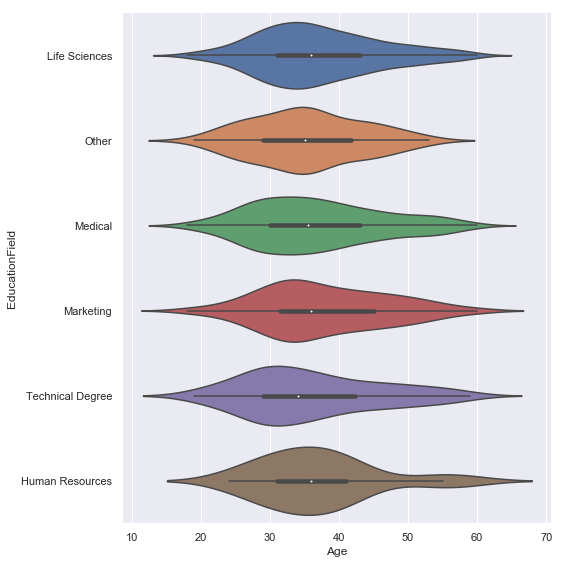

In [13]:
sns.catplot(x="Age", y="EducationField",
            kind="violin", data=df, height=8, kde=False); 
 

### Violin Plot
#### Pros:
Shows the probability density as well as the information shown in a boxpot.
#### Cons:
Violin plots are a little more noisier than jsut a box plot alone. Specific values are not visible.

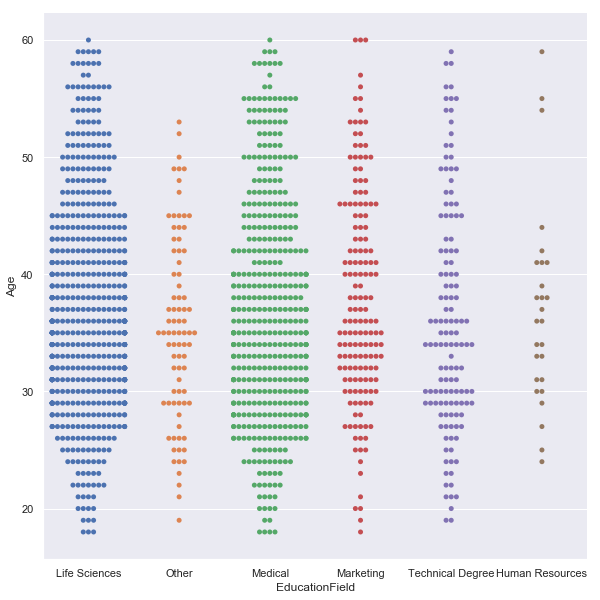

In [14]:
sns.catplot(x="EducationField", y="Age",  kind="swarm", data=df, height=8.5);

### Swarm Plot
#### Pros: 
You can easily see the individual data points and gives a good idea of the distribution.
#### Cons:
doesn't scale well with large numbers of observations. 

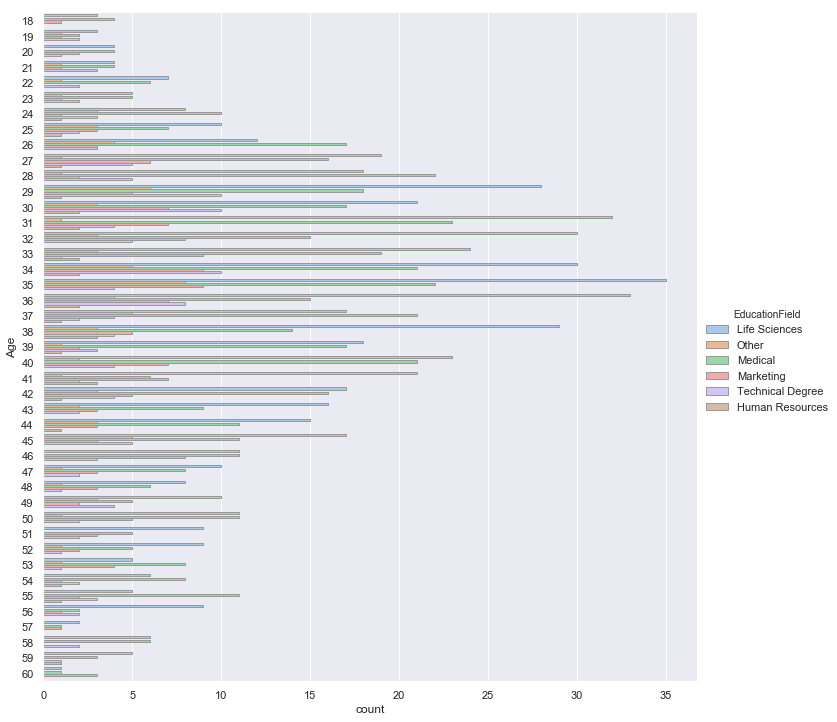

In [15]:
sns.catplot(y="Age", hue="EducationField", kind="count",
            palette="pastel", edgecolor=".6",
            data=df, height= 10)
plt.show()

### Bar Plot
#### Pros: 
Shows counts for each category by each data point.
#### Cons:
doesn't work very well with 

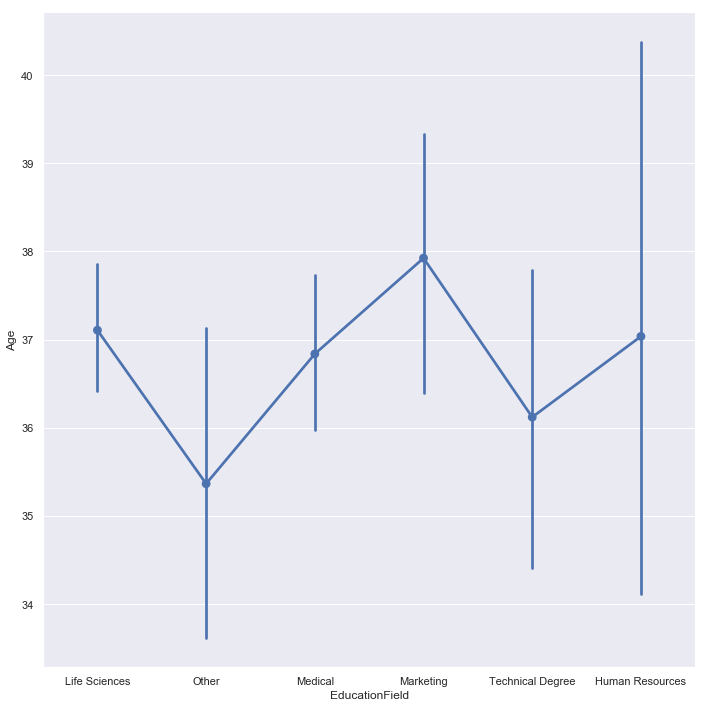

In [16]:
sns.catplot(x="EducationField", y="Age", kind="point", data=df, height=10);

### Point Plot
#### Pros: 
Shows estimates for central tendancy along with error bars. Easier to interpret than a bar graph.
#### Cons:
Individual data points not retained. Doesn't not show a distribution.